# Human Activity Recognition with Smartphones

### Dataset source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)

## Dataset information:

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

## Description of experiments
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone on the waist. Using its embedded accelerometer and gyroscope, they captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). 


In [1]:
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from cycler import cycler
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from time import time

## Load Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
# Seems like 'subject' feature (participant id#) is numeric, let's change it to string
train_df['Data'] = 'Train'
test_df['Data'] = 'Test'
both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

label = both_df['Activity']

print('Shape Train:\t{}'.format(train_df.shape))
print('Shape Test:\t{}\n'.format(test_df.shape))
print('Shape Combined:\t{}'.format(both_df.shape))

Shape Train:	(7352, 564)
Shape Test:	(2947, 564)

Shape Combined:	(10299, 564)


In [6]:
both_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


## Exploratory Data Analysis (EDA)

### 1. Is there any missing value?

In [7]:
train_df.isnull().any().any()

False

In [8]:
test_df.isnull().any().any()

False

Good, there's no missing data in the dataframe.

### 2. What features are in the dataset

In [9]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


There are in total over 500 features in this dataset. A lot of them are 'acceleration' and 'gyro' related, and a couple of 'gravity' related features. As shown above, except for the 'Activity' feature and our newly created 'Data' and 'subject' features, all values are numeric.

### 3. Is this dataset balanced in term of activities?

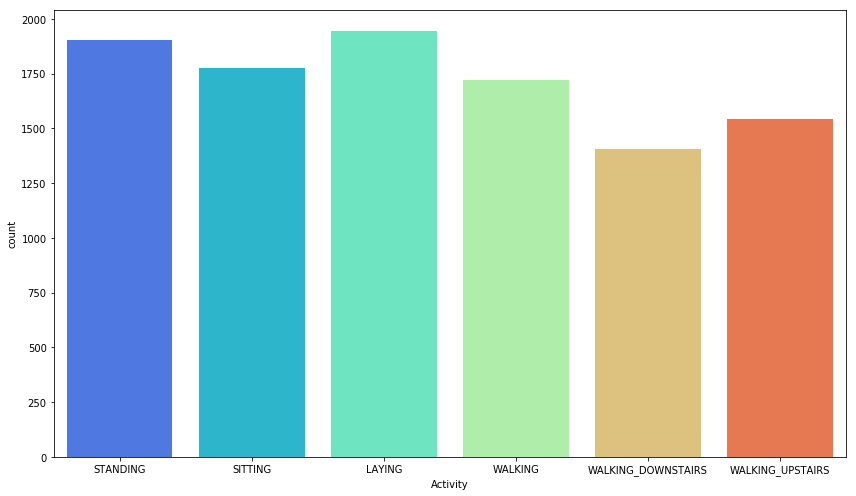

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(x='Activity', data=both_df, palette='rainbow')
plt.tight_layout()
plt.show()

There's small fluctuations between activity labels but in general, the labels are nicely balanced

### 4. Is this data balanced in term of participants?

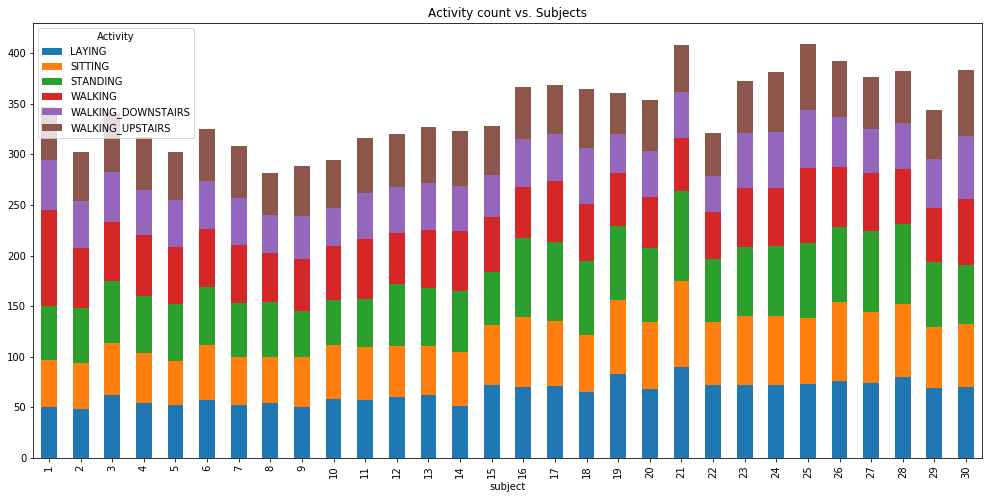

In [11]:
stack_group = both_df.groupby(['subject','Activity']).size().unstack()
stack_group.plot(kind='bar',stacked=True, figsize=(17, 8), title = 'Activity count vs. Subjects')
plt.show()

Activities are pretty evenly distributed among all 30 participants (subjects) and all participants completed similar total count of activities.

### 5. What are the datatypes in the dataset?

In [12]:
#Check datatype for all columns
train_df.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
tBodyAcc-std()-Z                        float64
tBodyAcc-mad()-X                        float64
tBodyAcc-mad()-Y                        float64
tBodyAcc-mad()-Z                        float64
tBodyAcc-max()-X                        float64
tBodyAcc-max()-Y                        float64
tBodyAcc-max()-Z                        float64
tBodyAcc-min()-X                        float64
tBodyAcc-min()-Y                        float64
tBodyAcc-min()-Z                        float64
tBodyAcc-sma()                          float64
tBodyAcc-energy()-X                     float64
tBodyAcc-energy()-Y                     float64
tBodyAcc-energy()-Z                     float64
tBodyAcc-iqr()-X                        float64
tBodyAcc-iqr()-Y                        

Seems all except the 'Activity' label and newly created 'Data' feature, all are numeric data. Let's convert 'subject' feature (participant id#) into categoriecal data.

In [13]:
both_df['subject'] = '#' + both_df['subject'].astype(str)

In [14]:
both_df.subject.dtype

dtype('O')

### 6. How are observations distributed among subjects?

In [15]:
pd.crosstab(both_df.subject, both_df.Activity).sort_values(by=['subject'])

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
#1,50,47,53,95,49,53
#10,58,54,44,53,38,47
#11,57,53,47,59,46,54
#12,60,51,61,50,46,52
#13,62,49,57,57,47,55
#14,51,54,60,59,45,54
#15,72,59,53,54,42,48
#16,70,69,78,51,47,51
#17,71,64,78,61,46,48


It is good that the data is almost evenly distributed for all the activities among all the subjects.

### 7. How are the acceleration data distributed along X, Y and Z axis?

Choosing subject #1 as example, let's plot the mean body acceleration in three spatial dimensions:

In [16]:
sub_1 = both_df.loc[both_df['subject']=='#15']
sub_1.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
2543,0.283844,-0.025631,-0.137341,-0.960858,-0.930150,-0.921956,-0.973115,-0.946458,-0.924978,-0.897013,...,-0.030274,-0.056318,0.008378,-0.081028,-0.826107,0.180543,-0.073548,#15,STANDING,Train
2544,0.286995,-0.015406,-0.104869,-0.989618,-0.965162,-0.977420,-0.989903,-0.967804,-0.978162,-0.927288,...,-0.585854,0.213043,0.259904,0.166599,-0.825999,0.184217,-0.069840,#15,STANDING,Train
2545,0.276307,-0.014842,-0.103254,-0.996760,-0.982112,-0.989243,-0.997106,-0.982876,-0.988640,-0.940873,...,0.070390,-0.578821,-0.242464,0.491342,-0.827556,0.183137,-0.069407,#15,STANDING,Train
2546,0.279216,-0.012942,-0.109483,-0.995907,-0.980773,-0.990885,-0.996525,-0.980469,-0.991716,-0.941737,...,0.001314,-0.278944,-0.061716,-0.245705,-0.827234,0.181935,-0.071006,#15,STANDING,Train
2547,0.277072,-0.012053,-0.105052,-0.995879,-0.969620,-0.986827,-0.996744,-0.970844,-0.987729,-0.941045,...,0.070991,0.309418,-0.264973,0.150800,-0.829180,0.180127,-0.070919,#15,STANDING,Train


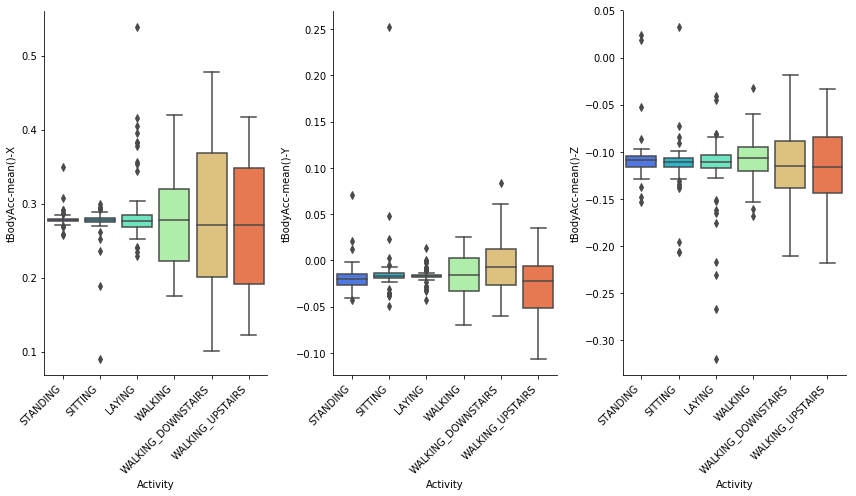

In [17]:
fig, axes = plt.subplots(1,3, sharey=False, figsize=(12,7))
sns.despine()
sns.boxplot(x='Activity', y=sub_1.iloc[:,0], data=sub_1, ax=axes[0], palette='rainbow')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
sns.boxplot(x='Activity', y=sub_1.iloc[:,1], data=sub_1, ax=axes[1], palette='rainbow')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")
sns.boxplot(x='Activity', y=sub_1.iloc[:,2], data=sub_1, ax=axes[2], palette='rainbow')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

This makes sense, the mean body acceleration varies a lot more for active movements such as walking, going up and downstairs than for passive ones, especially in X direction.

### 8. Are maximum acceleration on three spatial dimensions separable for different activities?

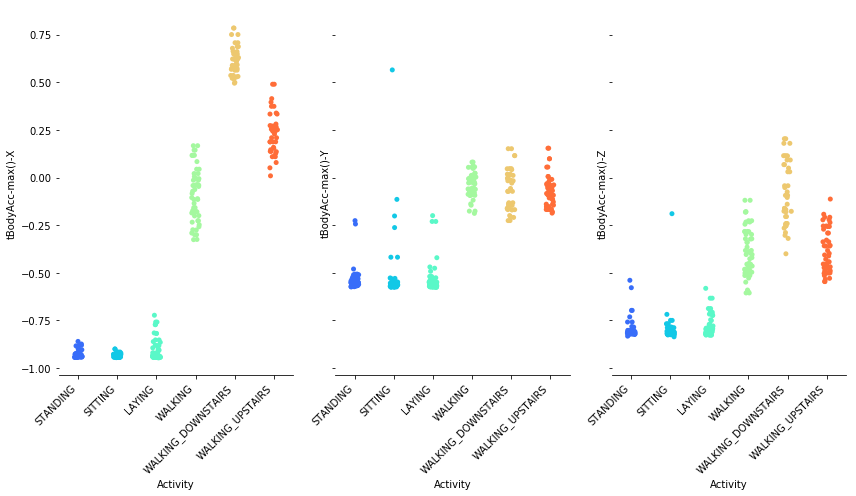

In [18]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(12,7))
sns.despine(left=True)
sns.stripplot(x='Activity', y='tBodyAcc-max()-X', data=sub_1, jitter=True, ax=axes[0], palette='rainbow')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
sns.stripplot(x='Activity', y='tBodyAcc-max()-Y', data=sub_1, jitter=True, ax=axes[1], palette='rainbow')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")
sns.stripplot(x='Activity', y='tBodyAcc-max()-Z', data=sub_1, jitter=True, ax=axes[2], palette='rainbow')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Interesting! All passive activities show slow acceleration on all dimensions, while active ones show high accelerations. The most informative feature is the acceleration on X axis, where walking downstairs showed much higher acceleration, followed by walking upstairs and just walking.

### 9. Are the activities separable?

I'm going to use t-distributed Stochastic Neighbor Embedding (t-SNE) method to visualize this high dimension data.

In [19]:
tsne_data = both_df.drop(['Activity'], axis=1).copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

#Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# PCA to reduce dimensions
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

#fit and transform by t-SNE
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

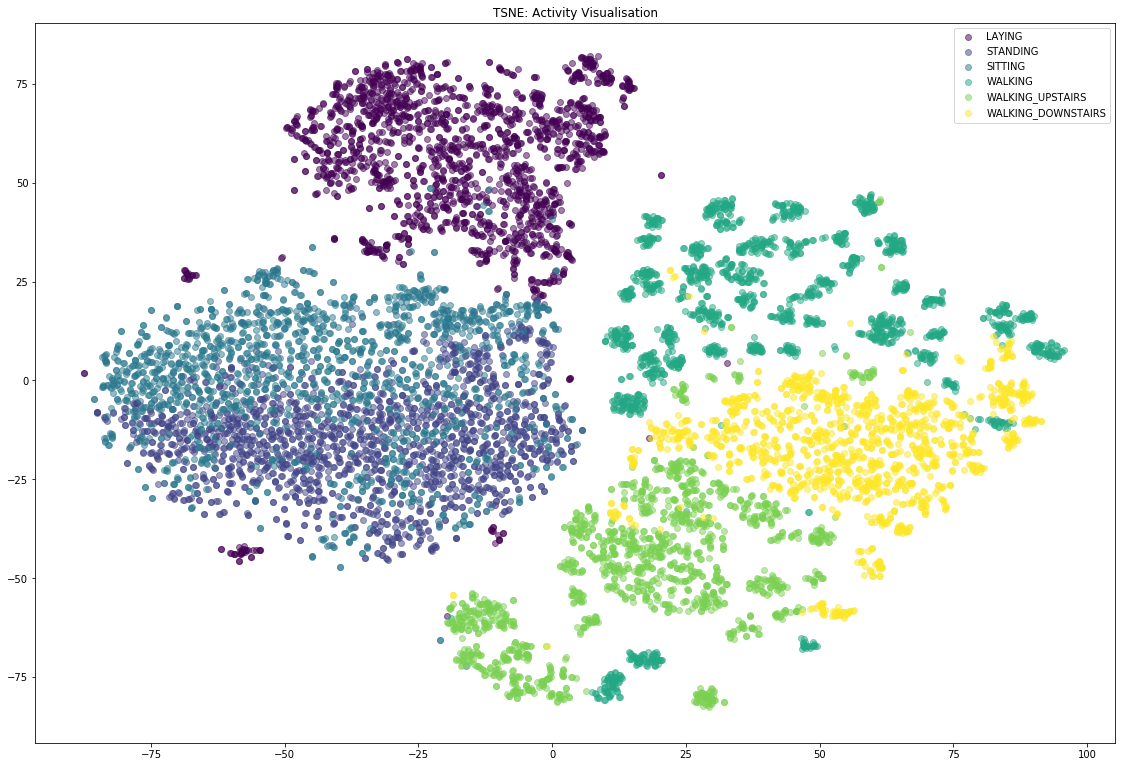

In [20]:
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap

#plot activities
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
n = label.unique().shape[0]
colormap = get_cmap('viridis')

label_counts = label.value_counts()
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
ax.set_title('TSNE: Activity Visualisation')
ax.legend(loc=0)
plt.show()

## Prepare Data For Training and Testing Purpose

In [21]:
both_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1,STANDING,Train


In [22]:
both_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 564 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(3)
memory usage: 44.3+ MB


In [23]:
X = both_df.iloc[:,:561]
label = both_df['Activity']

In [24]:
enc = LabelEncoder()
y = enc.fit_transform(label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [25]:
pca = PCA(n_components=120, random_state = 1300)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

In [26]:
X_train.shape

(7209, 120)

In [27]:
X_test.shape

(3090, 120)

## Model #1, Random Forest

### 1. Compare different number of trees

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf_RF_n = [RandomForestClassifier(n_estimators = 50, random_state  = 101),
            RandomForestClassifier(n_estimators = 150, random_state  = 101),
            RandomForestClassifier(n_estimators = 200, random_state  = 101),
            RandomForestClassifier(n_estimators = 400, random_state  = 101),
            RandomForestClassifier(n_estimators = 500, random_state  = 101)]

I choose accuracy score and run time as main criteria for evaluating outcome

In [29]:
from timeit import default_timer as timer
ex_time_RF_n = []
acc_RF_n = []

for clf in clf_RF_n :
    start_time = timer()
    fit = clf.fit(X_train, y_train)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_n.append(elapsed)
    acc_RF_n.append(accuracy)

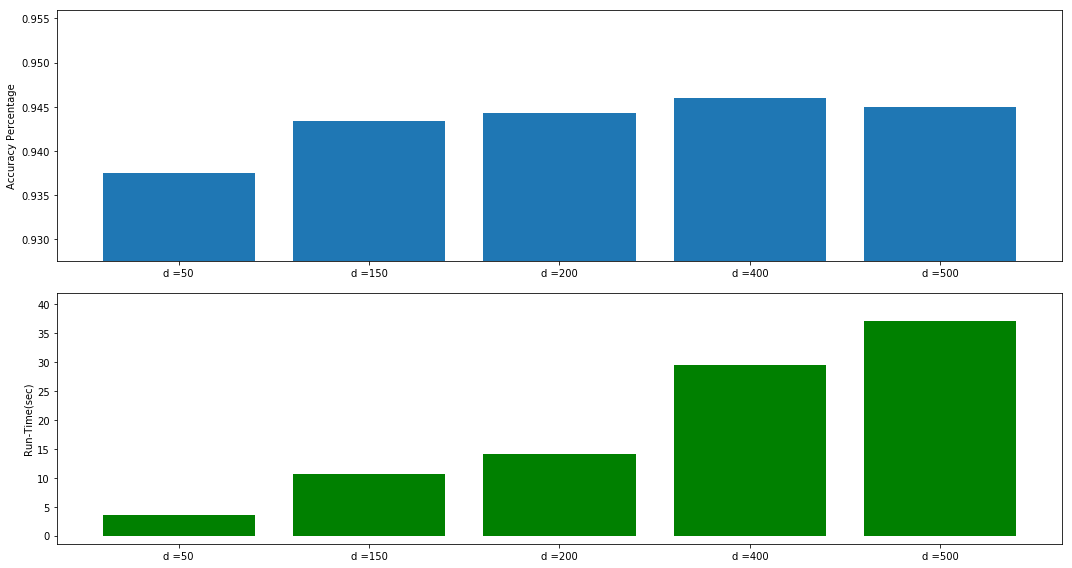

In [30]:
label = ('d =50','d =150','d =200','d =400','d =500')
Accu = acc_RF_n
ExTime = ex_time_RF_n

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')


#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

Seems like accuracy gradually increases from 10 to 400 trees and slightly declines afterwards. If we set accuracy as our first priority and ignore how much time it cost, we should choose 400 trees, if we take run time into consideration, n_estimator of 200 offers almost the same accuracy with only half of the run time.

### Compare maximum-depths

In [31]:
clf_RF_d = [RandomForestClassifier(n_estimators = 400, max_depth = 10, random_state  = 101),
            RandomForestClassifier(n_estimators = 400, max_depth = 20, random_state  = 101),
            RandomForestClassifier(n_estimators = 400, max_depth = 50, random_state  = 101),
            RandomForestClassifier(n_estimators = 400, max_depth = 100, random_state  = 101),
            RandomForestClassifier(n_estimators = 400, max_depth = 200, random_state  = 101)]

In [32]:
ex_time_RF_d = []
acc_RF_d = []

for clf in clf_RF_d :
    start_time = timer()
    fit = clf.fit(X_train, y_train)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_d.append(elapsed)
    acc_RF_d.append(accuracy)

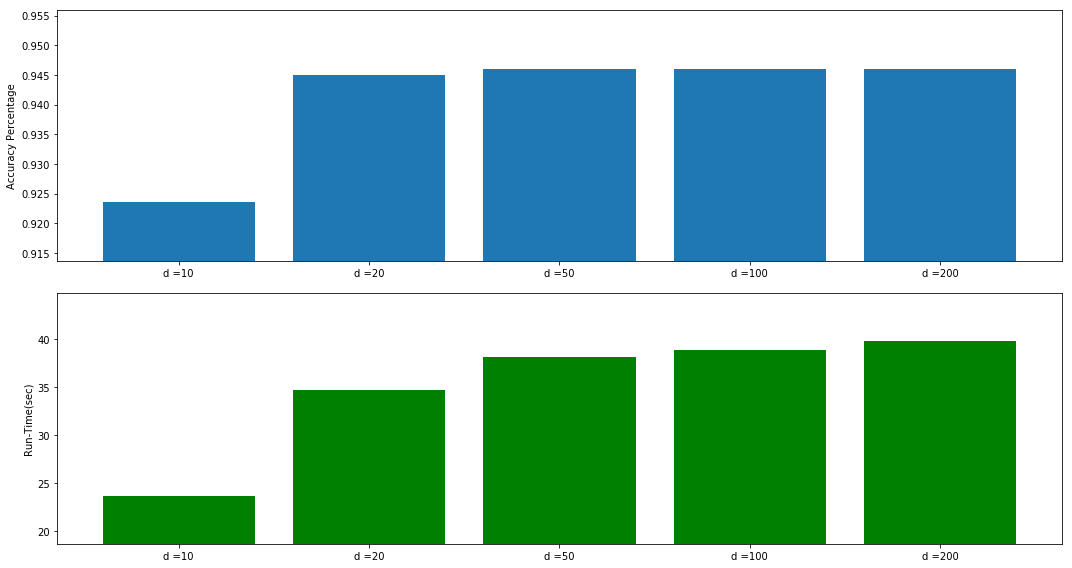

In [33]:
label = ('d =10','d =20','d =50','d =100','d =200')
Accu = acc_RF_d
ExTime = ex_time_RF_d


plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')


#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

Interestingly, maximum depth doesn't effect run time as much, depth above 20 doesn't improve performance in term of accuracy.

### Compare the criterion for split quality

In [34]:
clf_RF_c = [RandomForestClassifier(n_estimators = 400, max_depth = 20, criterion='gini', random_state  = 101),
            RandomForestClassifier(n_estimators = 400, max_depth = 20, criterion='entropy',random_state  = 101),]

In [35]:
ex_time_RF_c = []
acc_RF_c = []

for clf in clf_RF_c :
    start_time = timer()
    fit = clf.fit(X_train, y_train)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_c.append(elapsed)
    acc_RF_c.append(accuracy)

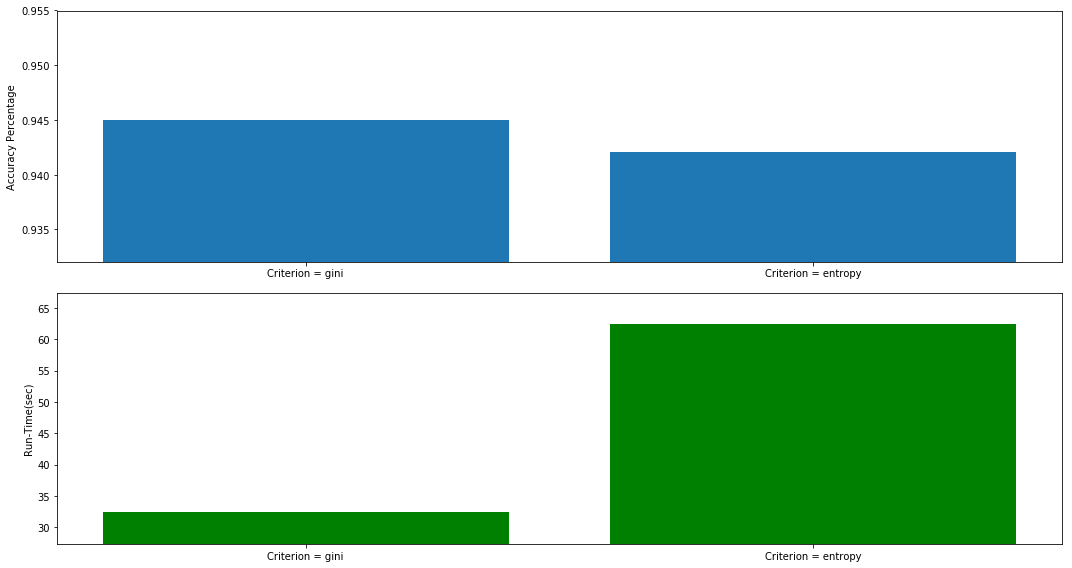

In [36]:
label = ('Criterion = gini','Criterion = entropy')
Accu = acc_RF_c
ExTime = ex_time_RF_c

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

Gini is the clear winner here, with almost half the run time, it claims higher accuracy than entropy.

### Compare the maximum number of features to consider 

In [37]:
clf_RF_f = [RandomForestClassifier(n_estimators = 400, max_depth = 20, max_features= 'log2', random_state  = 101),
            RandomForestClassifier(n_estimators = 400, max_depth = 20, max_features= 'sqrt',random_state  = 101),
            RandomForestClassifier(n_estimators = 400, max_depth = 20, max_features= None,random_state  = 101)]

In [38]:
ex_time_RF_f = []
acc_RF_f = []

for clf in clf_RF_f :
    start_time = timer()
    fit = clf.fit(X_train, y_train)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_f.append(elapsed)
    acc_RF_f.append(accuracy)

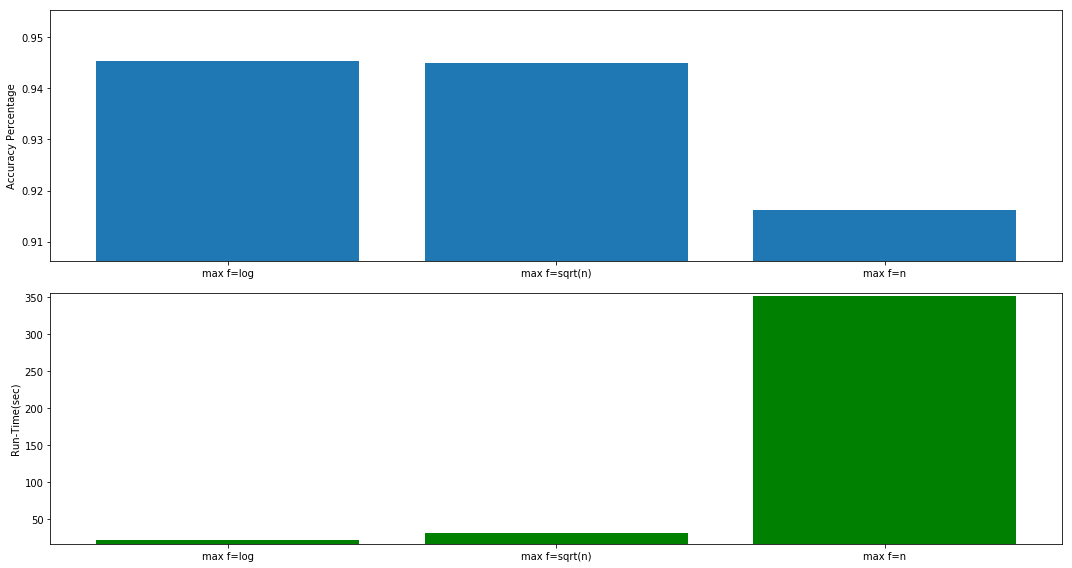

In [40]:
label = ('max f=log','max f=sqrt(n)','max f=n')
Accu = acc_RF_f
ExTime = ex_time_RF_f

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

The performance is almost the same for both hyperparameter, maximum features at log2 and, at sqrt(n)

## Model#2, Gradient Boosting

### Compare learning rate

In [41]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

clf_GBC_lr = [GBC(learning_rate=0.05, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 101),
           GBC(learning_rate=0.1, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 101),
           GBC(learning_rate=0.4, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 101),
           GBC(learning_rate=0.8, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 101)]

In [42]:
ex_time_GBC_lr = []
acc_GBC_lr = []

for clf in clf_GBC_lr :
    start_time = timer()
    fit = clf.fit(X_train, y_train)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    elapsed = timer() - start_time
    
    ex_time_GBC_lr.append(elapsed)
    acc_GBC_lr.append(accuracy)

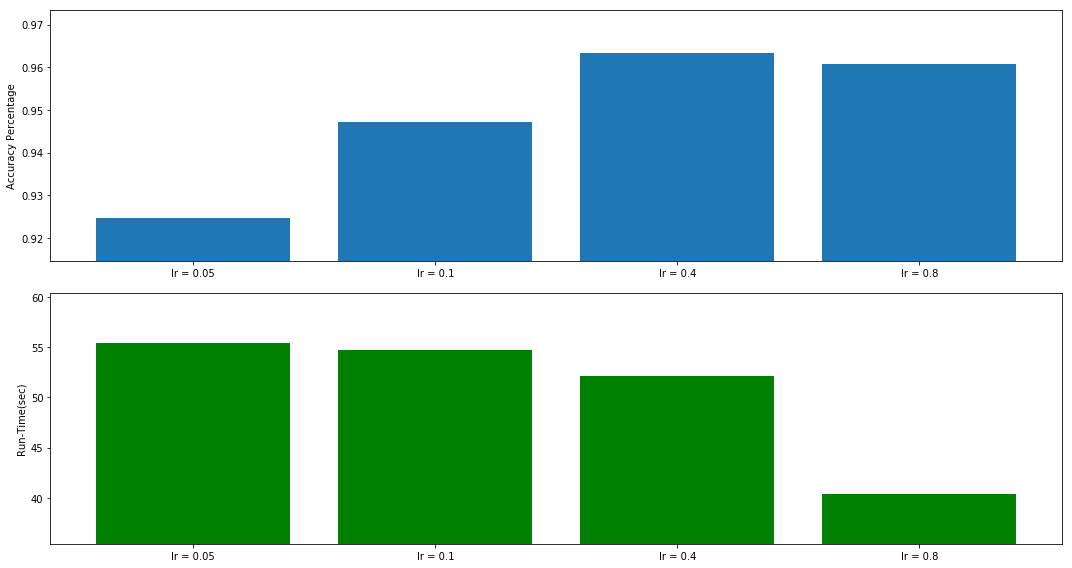

In [43]:
label = ('lr = 0.05','lr = 0.1','lr = 0.4','lr = 0.8')
Accu = acc_GBC_lr
ExTime = ex_time_GBC_lr

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

The learning rate seems to find a sweet spot at 0.4,achieved the highest accuracy so far, which I will be using from now on

### Compare different n values

In [44]:
clf_GBC_n = [GBC(learning_rate=0.4, n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 101),
             GBC(learning_rate=0.4, n_estimators=70, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 101),
             GBC(learning_rate=0.4, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 101),
             GBC(learning_rate=0.4, n_estimators=200, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 101)]

In [45]:
ex_time_GBC_n = []
acc_GBC_n = []

for clf in clf_GBC_n :
    start_time = timer()
    fit = clf.fit(X_train, y_train)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    elapsed = timer() - start_time
    
    ex_time_GBC_n.append(elapsed)
    acc_GBC_n.append(accuracy)

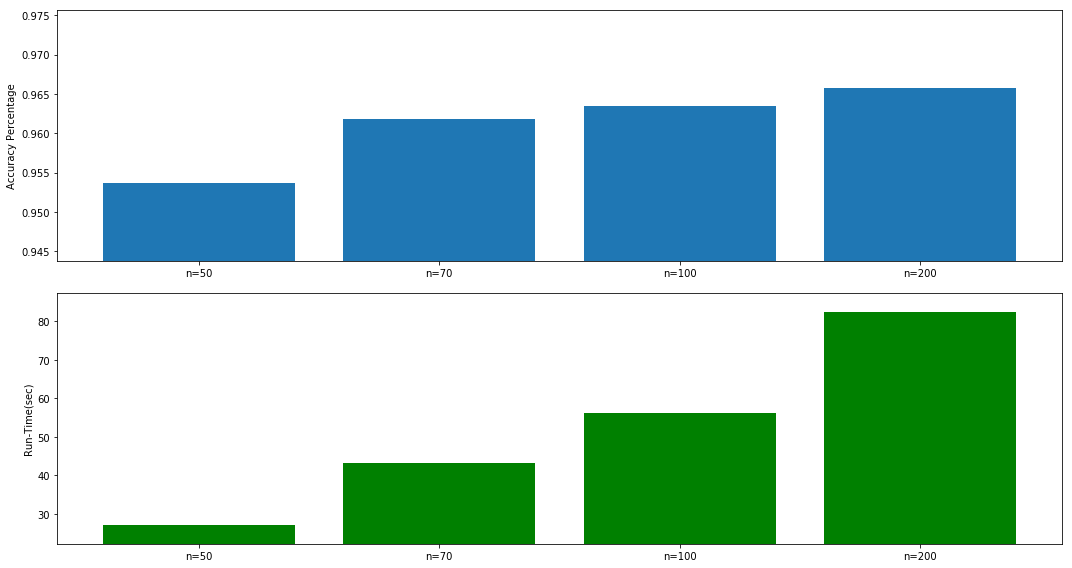

In [46]:
label = ('n=50','n=70','n=100','n=200')
Accu = acc_GBC_n
ExTime = ex_time_GBC_n

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')


#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

### Compare depths of trees

In [47]:
clf_GBC_d = [GBC(learning_rate=0.8, n_estimators=100, max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state = 101),
             GBC(learning_rate=0.8, n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state = 101),
             GBC(learning_rate=0.8, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state = 101),
             GBC(learning_rate=0.8, n_estimators=100, max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state = 101)]

In [48]:
ex_time_GBC_d = []
acc_GBC_d = []

for clf in clf_GBC_d :
    start_time = timer()
    fit = clf.fit(X_train, y_train)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    elapsed = timer() - start_time
    
    ex_time_GBC_d.append(elapsed)
    acc_GBC_d.append(accuracy)

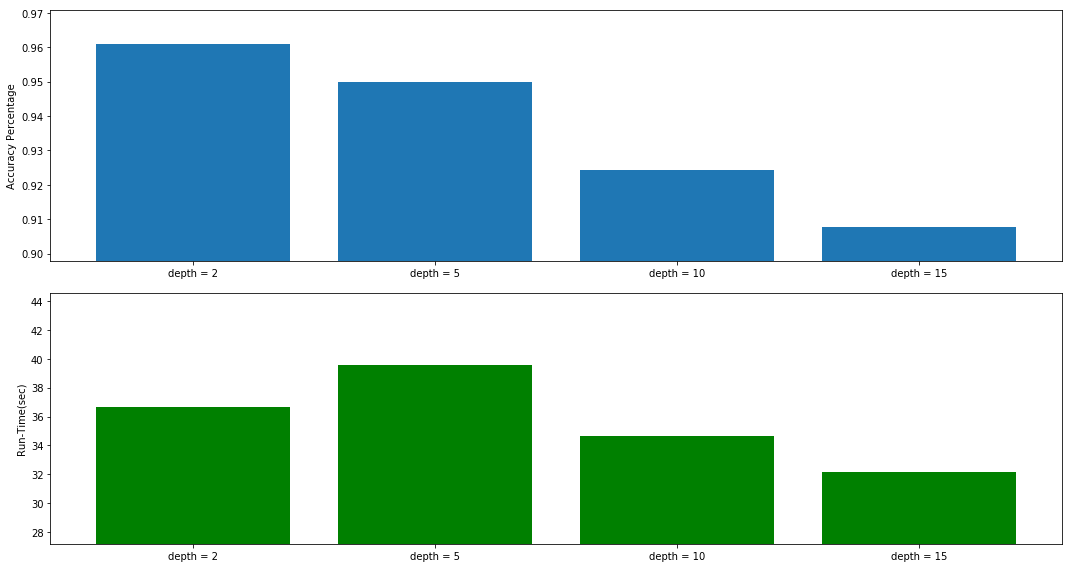

In [50]:
label = ('depth = 2','depth = 5', 'depth = 10', 'depth = 15')
Accu = acc_GBC_d
ExTime = ex_time_GBC_d


plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')


#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

Accuracy drops pretty fast with increasing depth of trees

### Compare maximum number of features

In [51]:
clf_GBC_f = [GBC(n_estimators = 200, learning_rate=0.4, max_depth=2, max_features ='log2', random_state=101),
             GBC(n_estimators = 200, learning_rate=0.4, max_depth=2, max_features ='sqrt', random_state=101),
             GBC(n_estimators = 200, learning_rate=0.4, max_depth=2, random_state=101)]

In [52]:
ex_time_GBC_f = []
acc_GBC_f = []

for clf in clf_GBC_f :
    start_time = timer()
    fit = clf.fit(X_train, y_train)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    elapsed = timer() - start_time
    
    ex_time_GBC_f.append(elapsed)
    acc_GBC_f.append(accuracy)

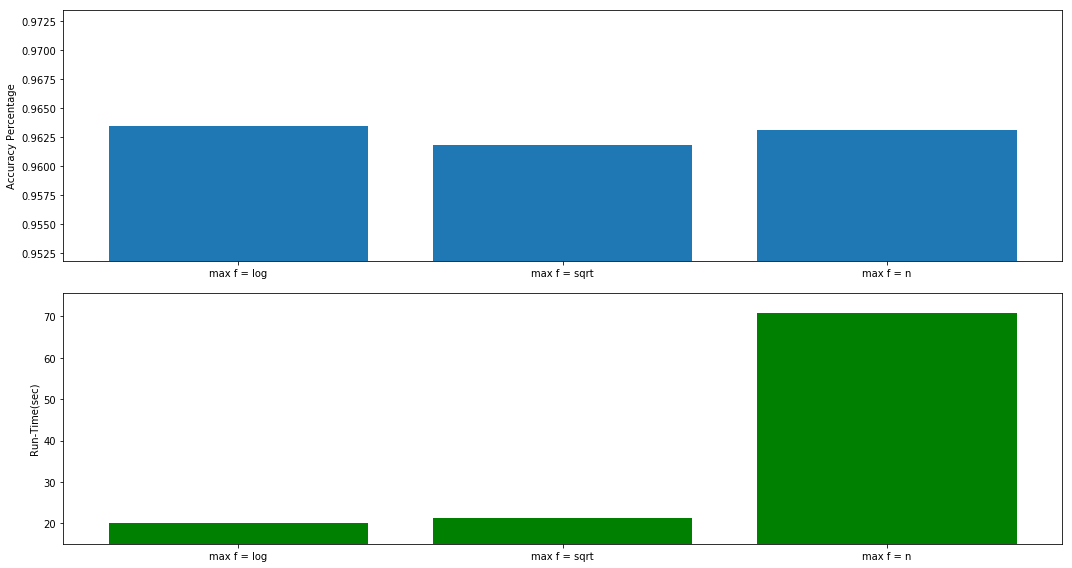

In [53]:
label = ('max f = log','max f = sqrt','max f = n')
Accu = acc_GBC_f
ExTime = ex_time_GBC_f

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

All three hyperparameters show similar results at ~ 96% accuracy.